# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [4]:
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of &lt;embed&gt; usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an &lt;a&gt; with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of &lt;img&gt; tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 &lt;a&gt; 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer| Number of &lt;a&gt; markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [5]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Started

 >### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

>### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [7]:
# Option 1: Find out P ( evergreen | is_news = 1) vs P ( evergreen | is_news = ?)
data.groupby('is_news')['label'].mean()
#data.groupby(['is_news'])[['label']].mean()

is_news
1    0.516916
?    0.507562
Name: label, dtype: float64

In [8]:
pd.crosstab(data.is_news, data.label)

label,0,1
is_news,,
1,2199,2353
?,1400,1443


In [13]:
data[data.is_news == "1"].shape

(4552, 29)

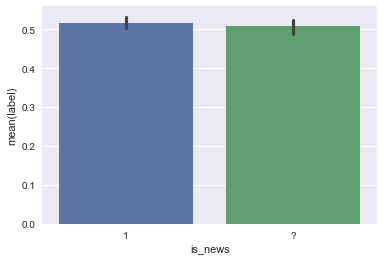

In [4]:
# Option 2: Plot in Seaborn

sns.barplot(x="is_news", y="label", data=data)
plt.show()

### Exercise: 4. Does category in general affect evergreeness? 
Compute and plot the rate of evergreen sites for all Alchemy categories.

In [16]:
data.groupby('alchemy_category')[['label']].mean().sort_values(by="label", ascending=False)

,label
alchemy_category,
business,0.711364
recreation,0.684296
health,0.573123
?,0.502135
culture_politics,0.457726
science_technology,0.456747
law_crime,0.419355
religion,0.416667
arts_entertainment,0.371945


In [18]:
category_order = data.groupby(['alchemy_category'])[['label']].mean().sort_values(by="label", ascending=False).reset_index()["alchemy_category"]

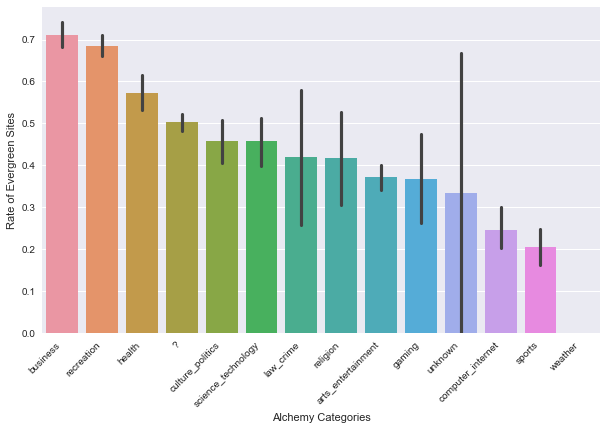

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x="alchemy_category", y="label", data=data, order=category_order)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Rate of Evergreen Sites")
plt.xlabel("Alchemy Categories")
plt.show()

### Exercise: 5. How many articles are there per category?

In [22]:
data.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

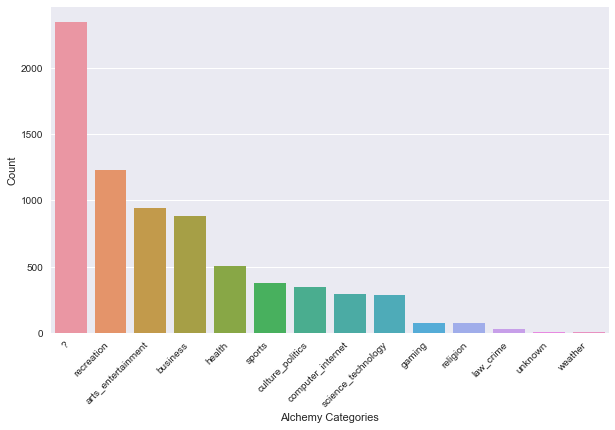

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x="alchemy_category", y="label", data=data, estimator=len, order = data.alchemy_category.value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Count")
plt.xlabel("Alchemy Categories")
plt.show()

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evergreen websites higher or lower on pages that have recipe in the the title?

In [11]:
# Option 1: Create a function to check for this
def has_recipe(text_in):
    if text_in is None: 
        return 0
    elif 'recipe' in str(text_in.encode('utf8')).lower():
        return 1
    return 0
    
data['recipe'] = data['title'].apply(has_recipe)

In [12]:
# Option 2: lambda functions
data['recipe'] = data['title'].apply(lambda t: 0 if t is None else 1 if 'recipe' in str(t.encode('utf8')).lower() else 0)

In [24]:
# Option 3: Pandas Series string functions
data['recipe'] = data['title'].str.contains('recipe', case=False)

In [25]:
data.groupby(['recipe'])[['label']].mean()

,label
recipe,
False,0.455730
True,0.912206


### Gini Index

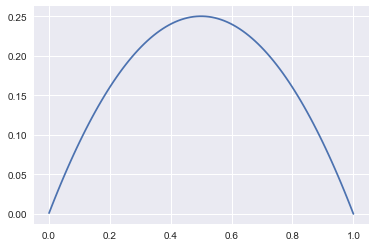

In [39]:
import numpy as np
x = np.linspace(0.001,1,100)
y = x * (1-x)
plt.plot(x,y)
plt.show()

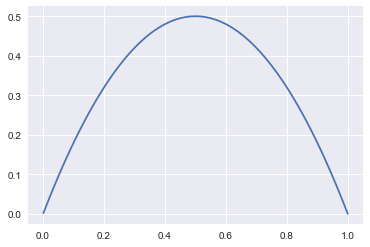

In [40]:
x = np.linspace(0.001,1,100)
y = x * (1-x) * 2
plt.plot(x,y)
plt.show()

### Entropy 

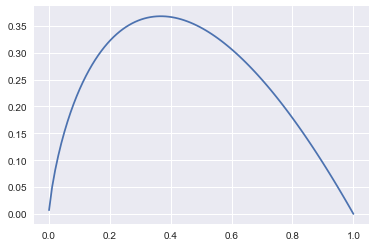

In [38]:
x = np.linspace(0.001,1,100)
y = -x * np.log(x)
plt.plot(x,y)
plt.show()

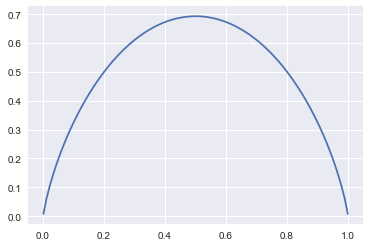

In [42]:
x = np.linspace(0.001,0.999,100)
y = -x * np.log(x) - (1-x) * np.log(1-x)
plt.plot(x,y)
plt.show()

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
# Fits the model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    #dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = "tree.dot", feature_names = X.columns)
    #dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.
 http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.54781656  0.57150524  0.58579424  0.5789407   0.56615048], Average AUC 0.57004144243


In [30]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [ 0.54533153  0.57481381  0.58401084  0.57655827  0.56097561], Average Accuracy 0.568338011264


###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [34]:
model = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5)
model.fit(X, y)
#build_tree_image(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [35]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.63047052  0.62111515  0.6578722   0.63373046  0.63016221], Average AUC 0.634670107439


In [36]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [ 0.58457375  0.58158429  0.61178862  0.58807588  0.58807588], Average Accuracy 0.590819684039


In [61]:
build_tree_image(model)

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, max_depth = 7)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.65682647  0.66265995  0.69663607  0.65138982  0.65906193], Average AUC 0.665314848139


### Demo: Extracting importance of features

In [39]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
2,recipe,0.524667
0,image_ratio,0.246655
1,html_ratio,0.228678


 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [67]:
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees, max_depth = 7)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.66008022  0.67615274  0.65839381], Average AUC 0.66487558911
n trees: 1, CV AUC [ 0.63965159  0.61607506  0.62651681], Average AUC 0.627414488445
n trees: 11, CV AUC [ 0.66029386  0.67375123  0.65510702], Average AUC 0.663050702457
n trees: 21, CV AUC [ 0.6570877   0.67711308  0.65483218], Average AUC 0.663010985462
n trees: 31, CV AUC [ 0.66405177  0.6869696   0.66467865], Average AUC 0.671900007339
n trees: 41, CV AUC [ 0.66198246  0.68218906  0.6540897 ], Average AUC 0.6660870706
n trees: 51, CV AUC [ 0.66211784  0.67739926  0.65915978], Average AUC 0.666225624122
n trees: 61, CV AUC [ 0.6612775   0.67892371  0.66267477], Average AUC 0.667625323624
n trees: 71, CV AUC [ 0.66433441  0.67870659  0.66283219], Average AUC 0.668624398425
n trees: 81, CV AUC [ 0.66500437  0.68135925  0.66107371], Average AUC 0.669145776647
n trees: 91, CV AUC [ 0.6605491   0.67988041  0.66478316], Average AUC 0.668404223329


##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [69]:
## 1. Building a model with more relevant features
model = RandomForestClassifier(n_estimators=50, max_depth=7)

# Continue to add features to X
# Build dummy features, include quantitative features, or add text features
X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)

## 2a. Evaluate predictive performance for the given feature set
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# 3 (BONUS): Adding in text features
# Check for keywords in the title
data['PhotoInTitle'] = data['title'].fillna('').str.lower().str.contains('photo').astype(int)
X = data[['image_ratio', 'html_ratio', 'recipe', 'PhotoInTitle', 'numberOfLinks', 'spelling_errors_ratio', 'label']].dropna()
X.drop('label', axis=1, inplace=True)

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

## 2b. Evaluating feature importances
# Fit a model on the whole dataset
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

CV AUC [ 0.66232883  0.68388502  0.66193592], Average AUC 0.66938325368
CV AUC [ 0.69163136  0.70308716  0.69263651], Average AUC 0.695785011022


,Features,Importance Score
2,recipe,0.479777
0,image_ratio,0.139123
5,spelling_errors_ratio,0.135044
4,numberOfLinks,0.120487
1,html_ratio,0.110245
3,PhotoInTitle,0.015324
